In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Set display options to show all columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Create a path to where the data is stored.
path = 'C:/Users/kaan/ML_2'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_cleaned.csv'))

In [5]:
df_pw = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'predictions_cleaned.csv'))

In [6]:
df.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,STOCKHOLM_humidity,MUNCHENB_pressure
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,0.98,1.0304
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,0.62,1.0292
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

In [7]:
# Sorting columns alphabetically
df = df[sorted(df.columns)]

In [8]:
df_pw.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# adding date column in order to isolate a decade 
# starting with importing original datasets
df_raw = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'raw.csv'))

In [10]:
df_pw_raw = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [11]:
# selecting 'DATE' column to add the cleaned datasets
df['DATE'] = df_raw['DATE'].values

In [12]:
df.head()

,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,BELGRADE_cloud_cover,BELGRADE_global_radiation,BELGRADE_humidity,BELGRADE_precipitation,BELGRADE_pressure,BELGRADE_sunshine,BELGRADE_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BUDAPEST_cloud_cover,BUDAPEST_global_radiation,BUDAPEST_humidity,BUDAPEST_precipitation,BUDAPEST_pressure,BUDAPEST_sunshine,BUDAPEST_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,DEBILT_cloud_cover,DEBILT_global_radiation,DEBILT_humidity,DEBILT_precipitation,DEBILT_pressure,DEBILT_sunshine,DEBILT_temp_max,DEBILT_temp_mean,DEBILT_temp_min,DUSSELDORF_cloud_cover,DUSSELDORF_global_radiation,DUSSELDORF_humidity,DUSSELDORF_precipitation,DUSSELDORF_pressure,DUSSELDORF_sunshine,DUSSELDORF_temp_max,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,HEATHROW_cloud_cover,HEATHROW_global_radiation,HEATHROW_humidity,HEATHROW_precipitation,HEATHROW_pressure,HEATHROW_sunshine,HEATHROW_temp_max,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,KASSEL_global_radiation,KASSEL_humidity,KASSEL_precipitation,KASSEL_pressure,KASSEL_sunshine,KASSEL_temp_max,KASSEL_temp_mean,KASSEL_temp_min,LJUBLJANA_cloud_cover,LJUBLJANA_global_radiation,LJUBLJANA_humidity,LJUBLJANA_precipitation,LJUBLJANA_pressure,LJUBLJANA_sunshine,LJUBLJANA_temp_max,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,MAASTRICHT_cloud_cover,MAASTRICHT_global_radiation,MAASTRICHT_humidity,MAASTRICHT_precipitation,MAASTRICHT_pressure,MAASTRICHT_sunshine,MAASTRICHT_temp_max,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MADRID_cloud_cover,MADRID_global_radiation,MADRID_humidity,MADRID_precipitation,MADRID_pressure,MADRID_sunshine,MADRID_temp_max,MADRID_temp_mean,MADRID_temp_min,MUNCHENB_cloud_cover,MUNCHENB_global_radiation,MUNCHENB_humidity,MUNCHENB_precipitation,MUNCHENB_pressure,MUNCHENB_sunshine,MUNCHENB_temp_max,MUNCHENB_temp_mean,MUNCHENB_temp_min,OSLO_cloud_cover,OSLO_global_radiation,OSLO_humidity,OSLO_precipitation,OSLO_pressure,OSLO_sunshine,OSLO_temp_max,OSLO_temp_mean,OSLO_temp_min,SONNBLICK_cloud_cover,SONNBLICK_global_radiation,SONNBLICK_humidity,SONNBLICK_precipitation,SONNBLICK_pressure,SONNBLICK_sunshine,SONNBLICK_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,STOCKHOLM_cloud_cover,STOCKHOLM_global_radiation,STOCKHOLM_humidity,STOCKHOLM_precipitation,STOCKHOLM_pressure,STOCKHOLM_sunshine,STOCKHOLM_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,DATE
0,7,0.32,0.85,0.09,1.018,0.7,10.9,6.5,0.8,1,0.88,0.81,0.00,1.0195,7.0,7.9,3.7,-0.9,4,0.44,0.67,0.01,1.017,2.3,5.1,2.4,-0.4,7,0.07,0.85,0.25,1.0032,0.0,11.0,9.3,7.4,8,0.12,0.83,0.08,1.0161,0.0,11.5,10.0,7.0,7,0.13,0.91,0.22,1.0010,0.0,8.3,10.6,9.4,8,0.28,0.82,0.48,1.0094,1.6,9.4,7.9,3.9,8,0.20,1.00,0.00,1.0173,0.0,0.5,-0.6,-1.9,7,0.22,0.83,0.32,1.0063,1.0,11.1,9.5,8.5,6,0.53,0.92,0.0,1.0260,1.4,10.8,7.6,4.4,5,0.20,0.67,0.10,1.0304,0.0,10.4,6.9,1.1,8,0.04,0.98,1.14,0.9978,0.0,5.9,4.9,3.8,4,0.48,0.73,0.01,1.0304,2.3,-3.2,-5.9,-8.5,5,0.05,0.98,0.32,1.0114,0.0,4.9,4.2,2.2,5,0.45,0.88,0.34,1.0003,4.7,10.9,8.5,6.0,19600101
1,6,0.36,0.84,1.05,1.018,1.1,10.1,6.1,3.3,6,0.25,0.84,0.00,1.0172,0.0,4.4,2.9,2.2,4,0.18,0.67,0.31,1.017,0.0,3.1,2.3,1.4,8,0.14,0.90,0.06,1.0056,0.1,8.3,7.7,6.4,8,0.18,0.89,0.66,1.0161,0.5,11.0,8.2,7.4,7,0.13,0.98,0.23,1.0051,0.0,10.6,6.1,3.9,6,0.12,0.86,0.27,1.0086,0.0,9.1,7.7,6.8,6,0.56,0.94,0.13,1.0173,3.2,5.5,2.1,-1.3,8,0.17,0.92,1.34,1.0062,0.4,9.9,8.6,7.5,7,0.46,0.86,0.0,1.0254,0.9,12.2,9.8,7.4,6,0.61,0.72,0.30,1.0292,5.1,10.2,6.2,4.2,8,0.04,0.62,0.00,1.0139,0.0,4.9,3.4,2.8,6,0.21,0.97,0.61,1.0292,0.0,-8.5,-9.5,-10.5,5,0.05,0.62,0.06,1.0114,0.0,5.0,4.0,3.0,7,0.25,0.91,0.84,1.0007,0.7,12.1,8.9,5.6,19600102
2,8,0.18,0.90,0.30,1.018,0.0,9.9,8.5,5.1,6,0.67,0.77,0.00,1.0179,3.5,6.4,3.1,-0.5,4,0.30,0.67,0.00,1.017,0.6,5.3,2.7,1.7

In [13]:
df_pw['DATE'] = df_pw_raw['DATE'].values

In [14]:
df_pw.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,DATE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19600101
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19600102
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19600103
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19600104
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19600105


In [15]:
# Select a decade for the model (2000-2009)
df_decade = df[
    (df['DATE'].astype(str).str[:4] >= '2000') &
    (df['DATE'].astype(str).str[:4] <= '2009')
]

In [16]:
df_decade.head()

,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,BELGRADE_cloud_cover,BELGRADE_global_radiation,BELGRADE_humidity,BELGRADE_precipitation,BELGRADE_pressure,BELGRADE_sunshine,BELGRADE_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BUDAPEST_cloud_cover,BUDAPEST_global_radiation,BUDAPEST_humidity,BUDAPEST_precipitation,BUDAPEST_pressure,BUDAPEST_sunshine,BUDAPEST_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,DEBILT_cloud_cover,DEBILT_global_radiation,DEBILT_humidity,DEBILT_precipitation,DEBILT_pressure,DEBILT_sunshine,DEBILT_temp_max,DEBILT_temp_mean,DEBILT_temp_min,DUSSELDORF_cloud_cover,DUSSELDORF_global_radiation,DUSSELDORF_humidity,DUSSELDORF_precipitation,DUSSELDORF_pressure,DUSSELDORF_sunshine,DUSSELDORF_temp_max,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,HEATHROW_cloud_cover,HEATHROW_global_radiation,HEATHROW_humidity,HEATHROW_precipitation,HEATHROW_pressure,HEATHROW_sunshine,HEATHROW_temp_max,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,KASSEL_global_radiation,KASSEL_humidity,KASSEL_precipitation,KASSEL_pressure,KASSEL_sunshine,KASSEL_temp_max,KASSEL_temp_mean,KASSEL_temp_min,LJUBLJANA_cloud_cover,LJUBLJANA_global_radiation,LJUBLJANA_humidity,LJUBLJANA_precipitation,LJUBLJANA_pressure,LJUBLJANA_sunshine,LJUBLJANA_temp_max,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,MAASTRICHT_cloud_cover,MAASTRICHT_global_radiation,MAASTRICHT_humidity,MAASTRICHT_precipitation,MAASTRICHT_pressure,MAASTRICHT_sunshine,MAASTRICHT_temp_max,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MADRID_cloud_cover,MADRID_global_radiation,MADRID_humidity,MADRID_precipitation,MADRID_pressure,MADRID_sunshine,MADRID_temp_max,MADRID_temp_mean,MADRID_temp_min,MUNCHENB_cloud_cover,MUNCHENB_global_radiation,MUNCHENB_humidity,MUNCHENB_precipitation,MUNCHENB_pressure,MUNCHENB_sunshine,MUNCHENB_temp_max,MUNCHENB_temp_mean,MUNCHENB_temp_min,OSLO_cloud_cover,OSLO_global_radiation,OSLO_humidity,OSLO_precipitation,OSLO_pressure,OSLO_sunshine,OSLO_temp_max,OSLO_temp_mean,OSLO_temp_min,SONNBLICK_cloud_cover,SONNBLICK_global_radiation,SONNBLICK_humidity,SONNBLICK_precipitation,SONNBLICK_pressure,SONNBLICK_sunshine,SONNBLICK_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,STOCKHOLM_cloud_cover,STOCKHOLM_global_radiation,STOCKHOLM_humidity,STOCKHOLM_precipitation,STOCKHOLM_pressure,STOCKHOLM_sunshine,STOCKHOLM_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,DATE
14610,8,0.20,0.89,0.03,1.0286,0.0,3.9,2.9,1.6,7,0.24,0.88,0.0,1.0275,0.0,-0.4,-2.5,-3.2,3,0.52,0.92,0.0,1.0268,3.7,-0.7,-4.9,-8.4,7,0.14,0.97,0.10,1.0240,0.0,8.1,6.1,3.5,8,0.12,0.92,0.22,1.0240,0.0,6.9,4.2,2.5,7,0.18,0.94,0.00,1.0245,0.4,10.8,7.0,4.9,6,0.12,0.93,0.13,1.0237,0.0,5.0,3.5,1.5,6,0.57,0.83,0.0,1.0294,5.2,-1.3,-4.8,-9.1,8,0.12,0.98,0.17,1.0251,0.0,6.9,5.6,4.1,1,1.02,0.80,0.0,1.0282,8.4,10.4,5.4,0.3,8,0.20,0.91,0.20,1.0420,0.0,2.6,1.7,-0.5,7,-0.03,0.94,0.60,1.0130,0.0,-3.2,-5.0,-8.6,7,0.82,0.89,1.34,1.0420,0.0,-13.4,-15.2,-17.0,8,0.05,0.94,0.17,1.0163,0.0,0.7,-2.3,-9.3,6,0.22,0.89,0.10,1.0235,0.7,11.0,6.6,2.1,20000101
14611,8,0.25,0.87,0.00,1.0318,0.0,4.8,3.6,2.7,8,0.25,0.85,0.0,1.0303,0.0,-0.3,-1.2,-2.6,8,0.14,0.94,0.0,1.0297,0.4,-1.9,-3.6,-5.0,8,0.08,0.97,0.00,1.0267,0.0,8.7,7.3,5.4,6,0.19,0.87,0.00,1.0283,0.7,7.9,6.5,2.7,7,0.20,0.89,0.02,1.0253,0.7,11.5,7.9,5.0,6,0.33,0.92,0.00,1.0290,2.9,4.7,2.3,0.3,6,0.59,0.76,0.0,1.0310,5.0,2.0,-0.9,-4.9,7,0.14,0.95,0.00,1.0286,0.0,7.5,6.2,4.2,0,1.03,0.78,0.0,1.0279,8.5,9.6,5.0,0.3,6,0.66,0.90,0.00,1.0467,6.1,5.8,1.9,-0.2,6,-0.03,0.94,0.00,1.0076,1.6,2.4,-0.8,-6.7,5,0.60,0.86,0.39,1.0467,2.8,-12.3,-13.7,-15.0,8,0.05,0.94,0.20,1.0108,0.0,2.0,1.3,0.5,8,0.13,0.92,0.42,1.0177,0.0,10.6,9.6,7.3,20000102
14612,5,0.50,0.81,0.00,1.0314,3.7,4.8,2.2,0.1,5,0.50,0.84,0.0,1.0310,1.4,1.4,-1.0,-3.4,6,0.19,0.

In [17]:
df_decade.shape

(3653, 136)

In [18]:
# selecting decade for prediction dataset
df_pw_decade = df_pw[
    (df_pw['DATE'].astype(str).str[:4] >= '2000') &
    (df_pw['DATE'].astype(str).str[:4] <= '2009')
]

In [19]:
df_pw_decade.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,DATE
14610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000101
14611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000102
14612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000103
14613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000104
14614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000105


In [20]:
df_pw_decade.shape

(3653, 16)

In [21]:
# Drop 'DATE' columns from datasets for the model 
df_decade.drop(['DATE'], axis=1, inplace=True)
df_pw_decade.drop(['DATE'], axis=1, inplace=True)

C:\Users\kaan\AppData\Local\Temp\ipykernel_4456\838702840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade.drop(['DATE'], axis=1, inplace=True)
C:\Users\kaan\AppData\Local\Temp\ipykernel_4456\838702840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pw_decade.drop(['DATE'], axis=1, inplace=True)


In [22]:
df_decade.shape

(3653, 135)

In [23]:
df_pw_decade.shape

(3653, 15)

In [24]:
# Adjust datasets for the model
## Converting to array
X=df_decade
y=df_pw_decade

In [25]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [26]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


## Hyperparameter optimization

### Grid Search

In [42]:
# creating a RF classifier
clf = RandomForestClassifier ()

In [46]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [47]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\kaan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kaan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kaan\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\kaan\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    

Search took 1.5670344988505045 minutes


In [48]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.5235487404162104


### Random Search

In [37]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [49]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [50]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 0.19416731993357342 minutes


In [51]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': np.int64(30), 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': np.int64(6), 'n_estimators': np.int64(310)}
Best RANDOM search score is: 0.4998174516246805


In [52]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.5235487404162104
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': np.int64(30), 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': np.int64(6), 'n_estimators': np.int64(310)}
Best RANDOM search score is: 0.4998174516246805


#### Grid Search gave a better accuracy score, so I'll use those hyperparameters to optimize the model.

## Random forest with optimized hyperparameters

In [53]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=7, min_samples_split=3, n_estimators=200)

In [54]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5514223194748359


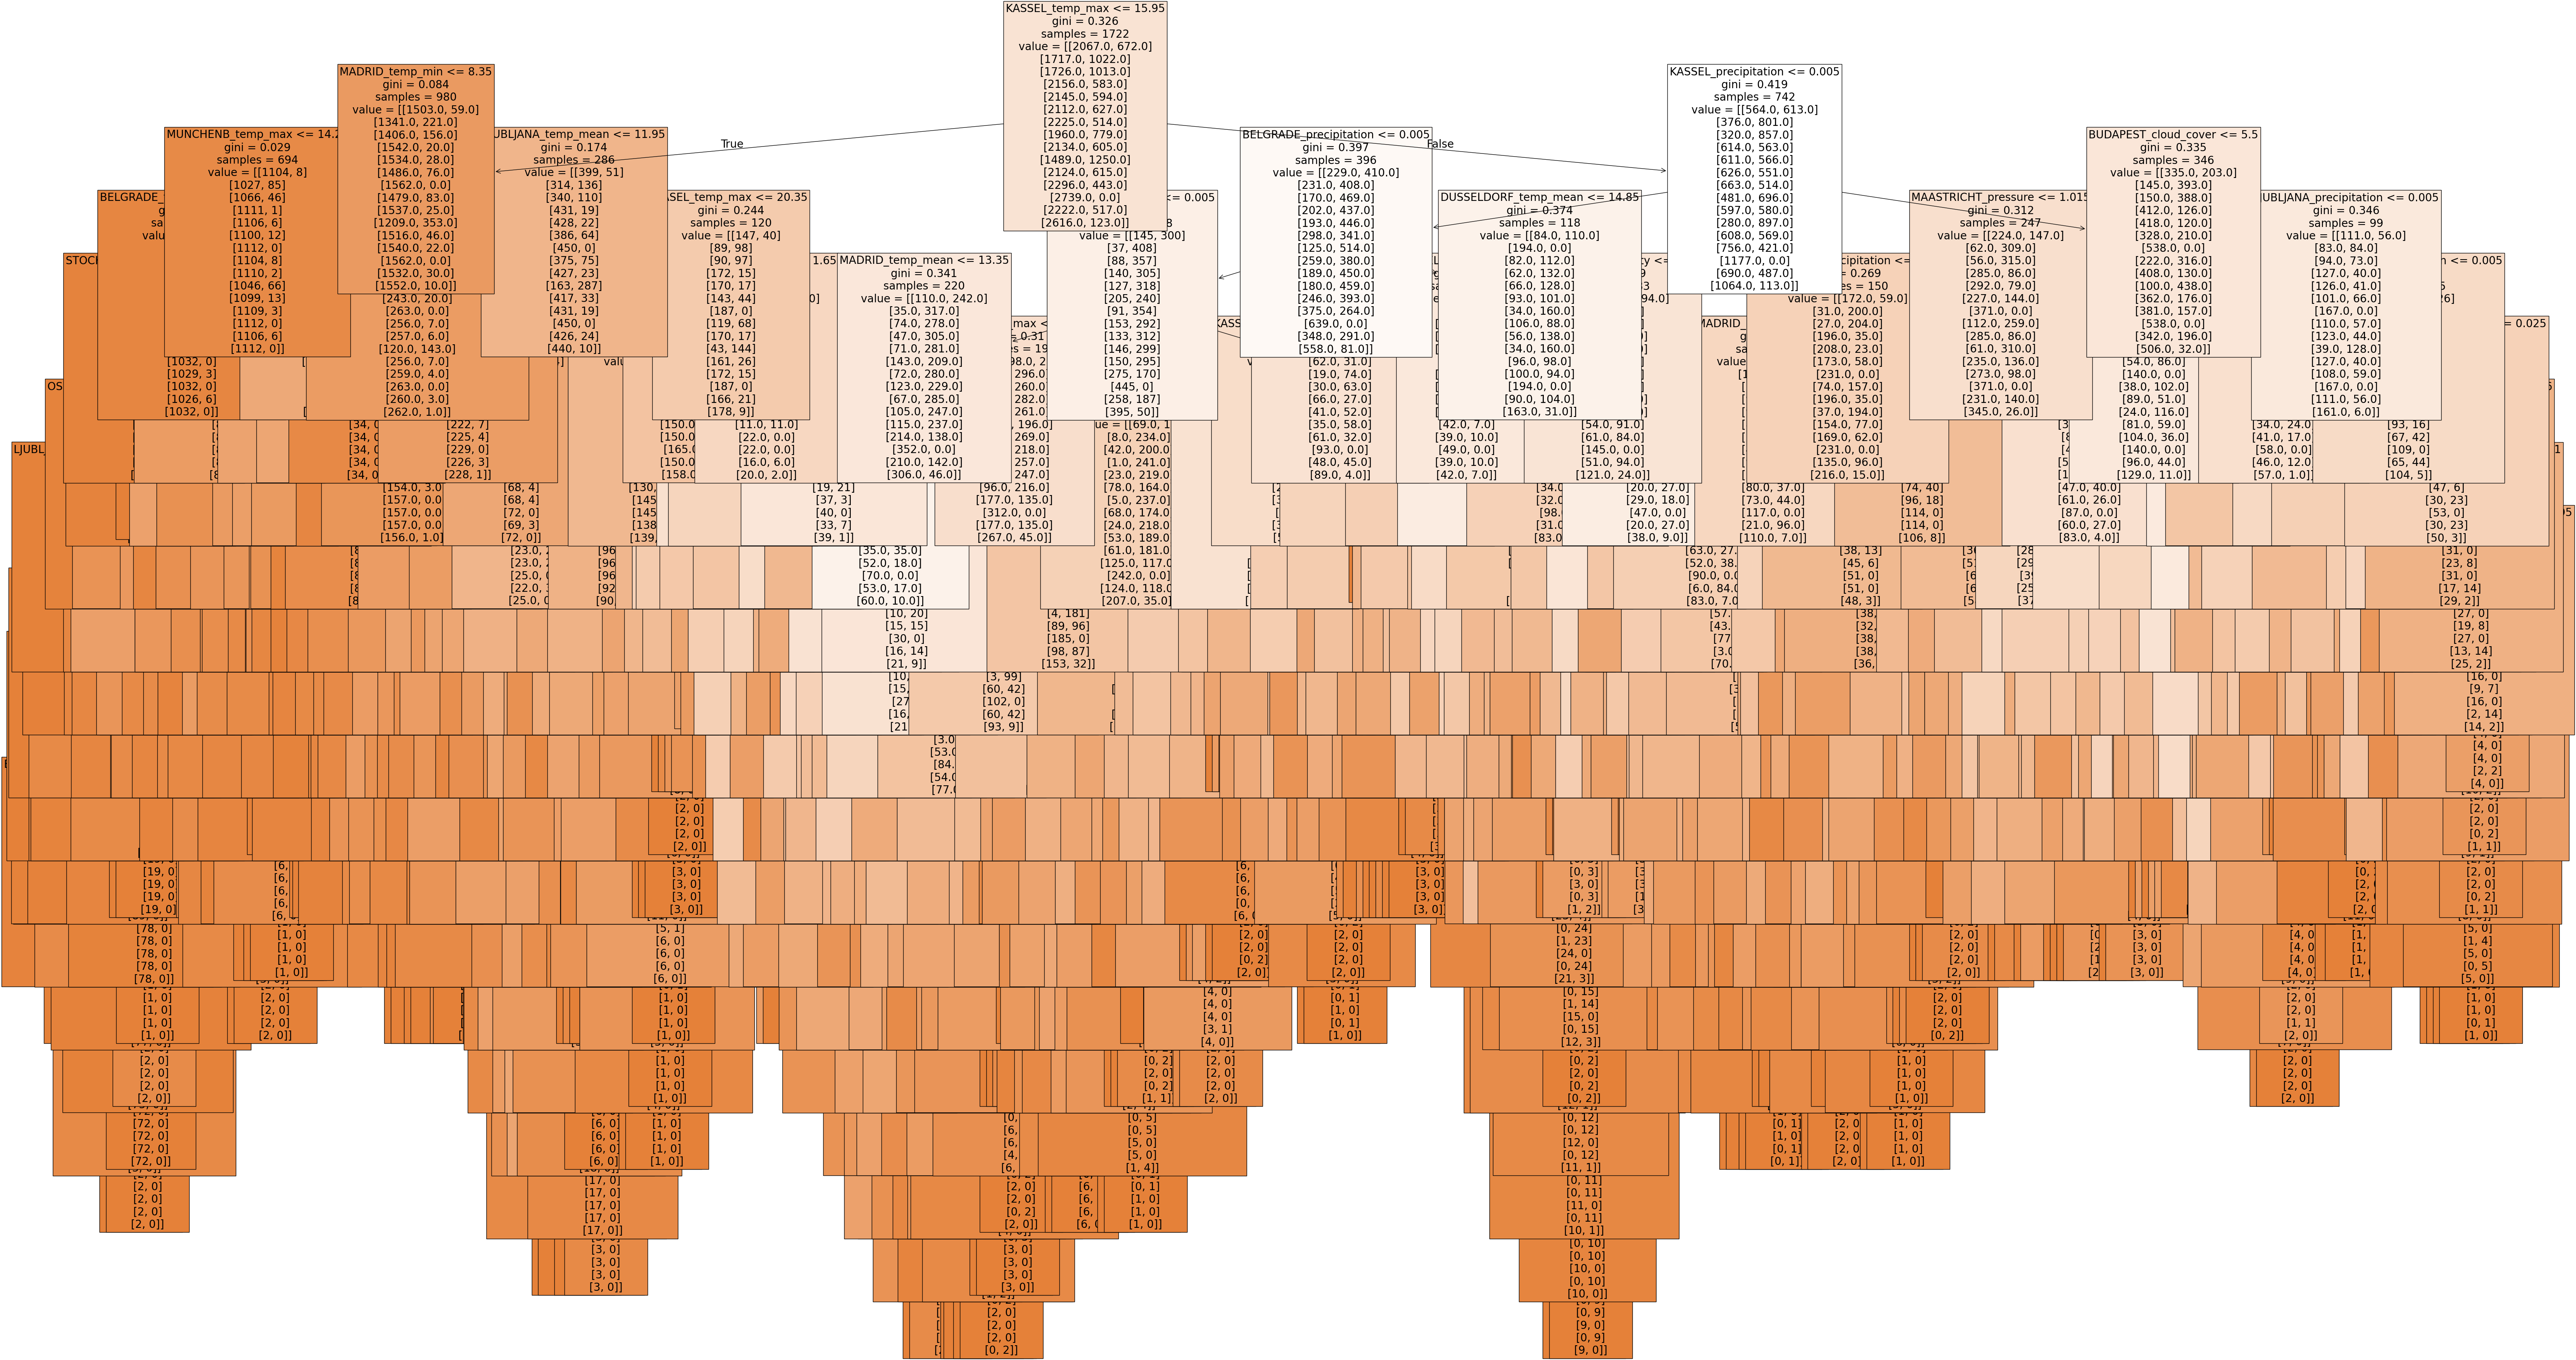

In [56]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = df_decade.columns, class_names=['unpleasant', 'pleasant'], filled=True);
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'random_forest_2000s_optimized.png'),bbox_inches='tight')

### Feature Importance

In [57]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([0.00283231, 0.00705792, 0.00310473, 0.01315004, 0.00318372,
       0.00737219, 0.02290329, 0.01765051, 0.00644477, 0.00373061,
       0.00513388, 0.00383229, 0.01204785, 0.00362093, 0.00423872,
       0.00758914, 0.01163249, 0.00307751, 0.00283405, 0.00505827,
       0.00370852, 0.00899094, 0.00355378, 0.0055528 , 0.01487867,
       0.00966111, 0.00729732, 0.0060187 , 0.0057327 , 0.00270446,
       0.01381986, 0.00530557, 0.00550426, 0.0269815 , 0.01357576,
       0.00261925, 0.00634121, 0.00510687, 0.00269778, 0.01808634,
       0.00461788, 0.00782764, 0.03139937, 0.01899241, 0.00376792,
       0.00216947, 0.00416093, 0.00351652, 0.00788623, 0.00408932,
       0.00366272, 0.02118182, 0.01126494, 0.00650939, 0.00374892,
       0.00367422, 0.00289197, 0.01277401, 0.00478604, 0.00569904,
       0.02437062, 0.0180159 , 0.00546411, 0.00331146, 0.00448229,
       0.00391608, 0.01252711, 0.00366618, 0.00511697, 0.02101672,
       0.01050603, 0.00437185, 0.00636352, 0.00443485, 0.00421

In [59]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00283231, 0.00705792, 0.00310473, 0.01315004, 0.00318372,
         0.00737219, 0.02290329, 0.01765051, 0.00644477],
        [0.00373061, 0.00513388, 0.00383229, 0.01204785, 0.00362093,
         0.00423872, 0.00758914, 0.01163249, 0.00307751],
        [0.00283405, 0.00505827, 0.00370852, 0.00899094, 0.00355378,
         0.0055528 , 0.01487867, 0.00966111, 0.00729732],
        [0.0060187 , 0.0057327 , 0.00270446, 0.01381986, 0.00530557,
         0.00550426, 0.0269815 , 0.01357576, 0.00261925],
        [0.00634121, 0.00510687, 0.00269778, 0.01808634, 0.00461788,
         0.00782764, 0.03139937, 0.01899241, 0.00376792],
        [0.00216947, 0.00416093, 0.00351652, 0.00788623, 0.00408932,
         0.00366272, 0.02118182, 0.01126494, 0.00650939],
        [0.00374892, 0.00367422, 0.00289197, 0.01277401, 0.00478604,
         0.00569904, 0.02437062, 0.0180159 , 0.00546411],
        [0.00331146, 0.00448229, 0.00391608, 0.01252711, 0.00366618,
         0.00511697, 0.02101672, 0.0105060

In [60]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.08369947, 0.05490342, 0.06153545, 0.08226206, 0.09883742,
       0.06444134, 0.08142482, 0.06891468, 0.09399966, 0.05839973,
       0.08271416, 0.05639802, 0.02966077, 0.05518429, 0.02762472])

In [61]:
# Convert the set of unique stations to a list

station = [col.split('_')[0] for col in df_decade.columns if '_' in col]

# Step 2: Get unique station names
stations = set(station)
stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [62]:
important = pd.Series(sumarray, index = stations)
important = important.sort_values(ascending = False)
important

MADRID        0.098837
BASEL         0.094000
STOCKHOLM     0.083699
MUNCHENB      0.082714
HEATHROW      0.082262
SONNBLICK     0.081425
DUSSELDORF    0.068915
MAASTRICHT    0.064441
LJUBLJANA     0.061535
VALENTIA      0.058400
KASSEL        0.056398
OSLO          0.055184
BUDAPEST      0.054903
BELGRADE      0.029661
DEBILT        0.027625
dtype: float64

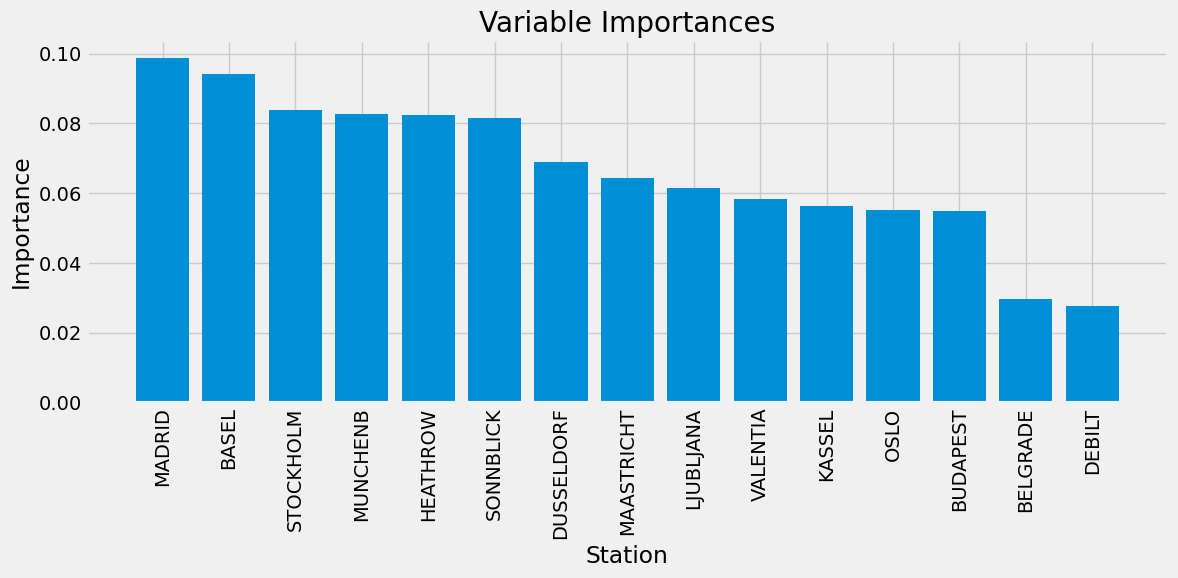

In [64]:
plt.style.use('fivethirtyeight')

values = important.values
stations = important.index.tolist()

x = range(len(values))

plt.figure(figsize=(12,6))
plt.bar(x, values)
plt.xticks(x, stations, rotation='vertical')

plt.xlabel('Station')
plt.ylabel('Importance')
plt.title('Variable Importances')

plt.tight_layout()
plt.savefig(r"C:\Users\kaan\ML_2\04 Analysis\Visualizations\variable_importances_optimized_RF_2000s.png",dpi=300,bbox_inches='tight')
plt.show()